# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Step 1. Get total number of rides for each city type - Create Series
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# Step 2. Get total number of drivers for each city type  - Create Series
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
# Step 3. Get total fare for each city type  - Create Series
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# Step 4. Get the average fare per ride by city type
avg_fare_count = total_fare_count / total_ride_count
avg_fare_count.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# Step 5. Get the average fare per driver by city type
# by dividing the sum of all the fares by the total drivers
avg_driver_fare = total_fare_count / total_driver_count
avg_driver_fare.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
# Step 6. Create a PyBer summary DataFrame
# Step 7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df = pd.DataFrame({"Total Rides": total_ride_count,
          "Total Drivers": total_driver_count,
          "Total Fare": total_fare_count,
          "Average Fare by Rides": avg_fare_count,
          "Average Fare by Driver": avg_driver_fare,})
PyBer_summary_df.index.name = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare by Rides,Average Fare by Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
# Format columns to have the comma for a thousands separator, a decimal separator, and a "$".

PyBer_summary_df["Total Fare"] = PyBer_summary_df["Total Fare"].map("${:,.2f}".format)

PyBer_summary_df["Total Fare"]

Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: Total Fare, dtype: object

In [10]:
# Format columns to have the comma for a thousands separator, a decimal separator, and a "$".
PyBer_summary_df["Average Fare by Rides"] = PyBer_summary_df["Average Fare by Rides"].map("${:,.2f}".format)

PyBer_summary_df["Average Fare by Rides"] 

Rural       $34.62
Suburban    $30.97
Urban       $24.53
Name: Average Fare by Rides, dtype: object

In [11]:
# Format columns to have the comma for a thousands separator, a decimal separator, and a "$".
PyBer_summary_df["Average Fare by Driver"] = PyBer_summary_df["Average Fare by Driver"].map("${:,.2f}".format)

PyBer_summary_df["Average Fare by Driver"] 

Rural       $55.49
Suburban    $39.50
Urban       $16.57
Name: Average Fare by Driver, dtype: object

In [12]:
# Step 8. Format the columns.
PyBer_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare by Rides,Average Fare by Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]

# fare_date_df
print(fare_date_df)

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64


In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_date_df = fare_date_df.reset_index()
fare_date_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [15]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#the index is the "date," each column is a city "type," and the values are the "fare."
fare_date_df = fare_date_df.pivot(index="date", columns="type", values="fare")

fare_date_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [23]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
selected_dates_df = fare_date_df.loc["1/1/2019":"4/29/2019"]
                                                                             
selected_dates_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [24]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
selected_dates_df.index = pd.to_datetime(selected_dates_df.index)

In [25]:
# 6. Check that the datatype for the index is datetime using df.info()
selected_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [26]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_week_df = selected_dates_df.resample("W").sum()

fare_week_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


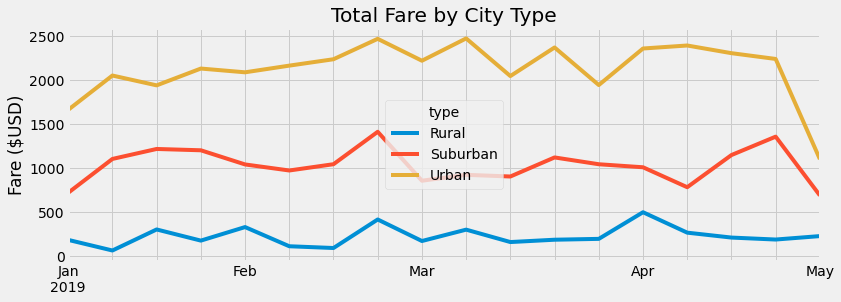

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = fare_week_df.plot(xticks=fare_week_df.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)
# Create a title. 
ax.set_title("Total Fare by City Type")
plt.legend(loc='center', title='type')

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")


plt.show()